# Import

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import string
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data 

In [38]:
data = pd.read_csv('small_complaints.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')
type(data)

pandas.core.frame.DataFrame

In [39]:
data = data[["Product","Consumer complaint narrative"]]

In [40]:
data.head()

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh..."
4,Debt collection,While checking my credit report I noticed thre...


In [41]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    20202
Debt collection                                                                  9230
Credit card or prepaid card                                                      4332
Mortgage                                                                         3475
Checking or savings account                                                      2538
Student loan                                                                     1540
Vehicle loan or lease                                                            1083
Money transfer, virtual currency, or money service                               1019
Payday loan, title loan, or personal loan                                         880
Consumer Loan                                                                       6
Credit card                                                                         5
Payday loan                                           

<AxesSubplot:>

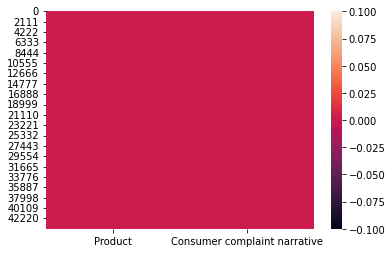

In [42]:
sns.heatmap(data.isnull())

# Preprocessing & Vizz

In [43]:
# We will group some product types 
data.loc[data['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
data.loc[data['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
data.loc[data['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
data.loc[data['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
data

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh..."
4,Debt collection,While checking my credit report I noticed thre...
...,...,...
44318,Mortgage,"To whom it may concern, Four or five years ago..."
44319,"Credit reporting, credit repair services, or o...",FOR MONTHS I HAVE BEEN ASKING EQUIFAX TO REMOV...
44320,Credit card or prepaid card,My accounts at Capital One were closed. I trie...
44321,"Credit reporting, credit repair services, or o...",I received my Credit Report from all 3 credit ...


In [44]:
# In the code below you should add : Prepaid card, Consumer Loan & Bank account or service to "Other financial service"
data.loc[data["Product"] =="Other financial service","Product"] = "Prepaid card"
data.loc[data["Product"] =="Other financial service","Product"] = "Consumer Loan"
data.loc[data["Product"] =="Other financial service","Product"] = "Bank account or service"

# CODE HERE

# We will not consider other financial service
# Code Here
data = data[data.Product != "other financial service"]


In [45]:
data = data.reset_index(drop=True)

In [46]:
data

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh..."
4,Debt collection,While checking my credit report I noticed thre...
...,...,...
44318,Mortgage,"To whom it may concern, Four or five years ago..."
44319,"Credit reporting, credit repair services, or o...",FOR MONTHS I HAVE BEEN ASKING EQUIFAX TO REMOV...
44320,Credit card or prepaid card,My accounts at Capital One were closed. I trie...
44321,"Credit reporting, credit repair services, or o...",I received my Credit Report from all 3 credit ...


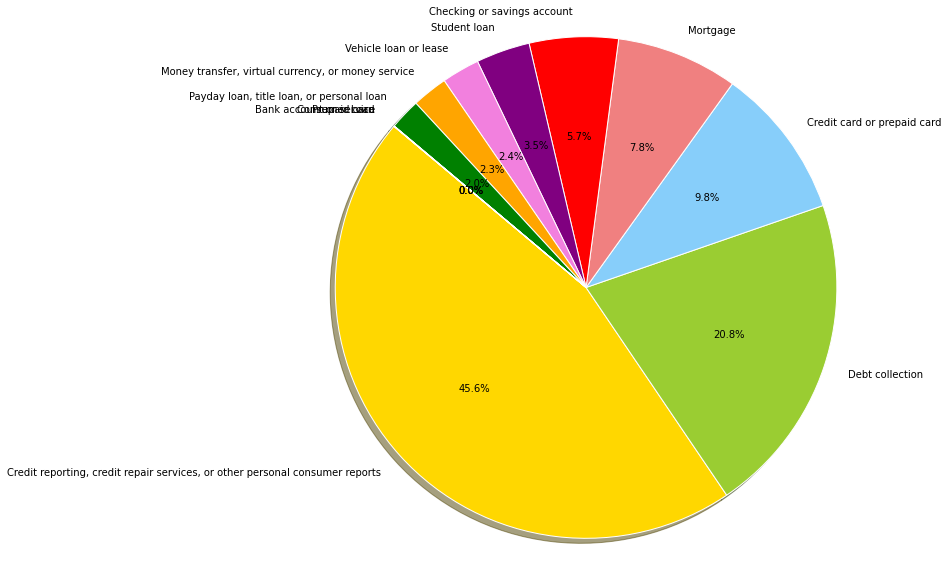

In [47]:
# Data to plot
labels = list(data.Product.value_counts().index)
sizes = list(data.Product.value_counts().values)
colors = ['gold','yellowgreen', 'lightskyblue', 'lightcoral', 'red', 'purple', '#f280de', 'orange', 'green']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={"edgecolor":"white"})
plt.axis('equal')
plt.show()

In [48]:
def complaint_product(indx,data):
  complaint = data['Consumer complaint narrative'][indx]
  product = data['Product'][indx]
  print(complaint)
  print('------------------------------')
  print("Product : ",product)

In [49]:
a =complaint_product(238, data)
a

Financial phishing!!! Was getting XXXX hang-up calls a day from XXXX, for several weeks, finally did a dial back and it was this company Opportunity Loans. Told them I was on the No Call List and wanted no further calls. Was told they were calling about my loan application and would need last XXXX of my SSN to pull ; advised I did n't have an application so my SSN would do them no good. Advised they could use my phone number to remove from their call list and any further representation that I had a loan application was fraudulent. Since that XXXX conversation I have received XXXX more hang up calls. I also received XXXX messages left from the same company on a toll free # XXXX, ignored the XXXX thinking it in error, the XXXX came in on XXXX, my conversation with the rep XXXX went much the same as my original conversation, with them insisting they needed SSN info to stop calls ; thus far I have not received further calls from this number- yet. I believe this particularly egregious phish

In [50]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, remove stop words and Xs.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [51]:
# Code Here
data['Consumer complaint narrative'] = clean_text(str(data)) # apply clean_text function 

In [66]:
'''l = len(data['Consumer complaint narrative'])
for i in range(44323) : 
    data['Consumer complaint narrative'][i] = clean_text(str(data['Consumer complaint narrative'][i]))
    
'''

"l = len(data['Consumer complaint narrative'])\nfor i in range(44323) : \n    data['Consumer complaint narrative'][i] = clean_text(str(data['Consumer complaint narrative'][i]))\n    \n"

In [67]:
data


,Product,Consumer complaint narrative
0,Debt collection,product debt collection credit reporting credi...
1,"Credit reporting, credit repair services, or o...",product debt collection credit reporting credi...
2,Debt collection,product debt collection credit reporting credi...
3,"Money transfer, virtual currency, or money ser...",product debt collection credit reporting credi...
4,Debt collection,product debt collection credit reporting credi...
...,...,...
44318,Mortgage,product debt collection credit reporting credi...
44319,"Credit reporting, credit repair services, or o...",product debt collection credit reporting credi...
44320,Credit card or prepaid card,product debt collection credit reporting credi...
44321,"Credit reporting, credit repair services, or o...",product debt collection credit reporting credi...


In [54]:
# After cleaning
complaint_product(238, data)

product debt collection credit reporting credit repair services debt collection money transfer virtual currency money ser debt collection mortgage credit reporting credit repair services credit card prepaid card credit reporting credit repair services credit reporting credit repair services consumer complaint narrative transworld systems inc nis trying collect would like request suppression past weeks receiving e sold access event digitally wh checking credit report noticed thre may concern four five years ago months asking equifa remov accounts capital one closed trie received credit report credit filed complaint cfpb regarding
------------------------------
Product :  Consumer Loan


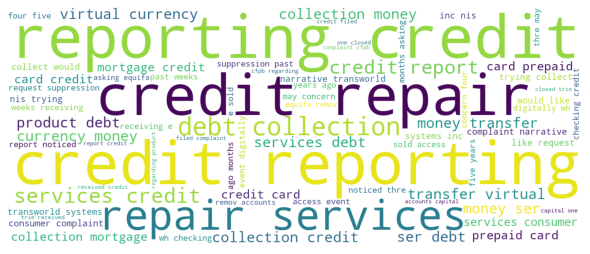

In [55]:
text = " ".join(complaint for complaint in data["Consumer complaint narrative"])
# Generate a word cloud image

wordcloud = WordCloud(width = 1200, height = 500, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [56]:
number_words = [len(complaints.split(' ')) for complaints in data["Consumer complaint narrative"]]

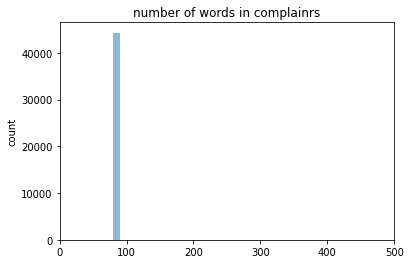

In [57]:
# fixed bin size
bins = np.arange(-0, 3000, 10) # fixed bin size

plt.xlim([0, 500])

plt.hist(number_words, bins=bins, alpha=0.5)
plt.title('number of words in complainrs')
plt.ylabel('count')

plt.show()

<AxesSubplot:>

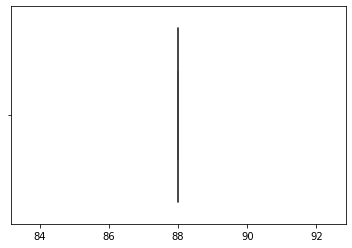

In [58]:
sns.boxplot(number_words)

# Multi-Class Text Classification LSTM 

In [59]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 60 unique tokens.


In [60]:
X = tokenizer.texts_to_sequences(data['Consumer complaint narrative'].values)#list of integers
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) #padding
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44323, 250)


In [61]:
labels = list(pd.get_dummies(data['Product']).columns)
Y = pd.get_dummies(data['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (44323, 12)


In [77]:
# Code Here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.80, random_state=50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8864, 250) (8864, 12)
(35459, 250) (35459, 12)


**Expected Output :**
(35449, 250) (35449, 9)
(8863, 250) (8863, 9)

In [78]:
# Code Here
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=None))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         5000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1212      
Total params: 5,081,612
Trainable params: 5,081,612
Non-trainable params: 0
_________________________________________________________________
None


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param   
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909    
_________________________________________________________________

Total params: 5,081,309
Trainable params: 5,081,309
Non-trainable params: 0


In [79]:
epochs = 5
batch_size = 64
# Code Here
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
125/125 [==============================] - 97s 755ms/step - loss: 1.7267 - accuracy: 0.4579 - val_loss: 1.6542 - val_accuracy: 0.4577
Epoch 2/5
125/125 [==============================] - 106s 847ms/step - loss: 1.6440 - accuracy: 0.4616 - val_loss: 1.6503 - val_accuracy: 0.4577
Epoch 3/5
125/125 [==============================] - 112s 896ms/step - loss: 1.6399 - accuracy: 0.4616 - val_loss: 1.6532 - val_accuracy: 0.4577
Epoch 4/5
125/125 [==============================] - 111s 888ms/step - loss: 1.6394 - accuracy: 0.4616 - val_loss: 1.6495 - val_accuracy: 0.4577
Epoch 5/5
125/125 [==============================] - 110s 879ms/step - loss: 1.6400 - accuracy: 0.4616 - val_loss: 1.6543 - val_accuracy: 0.4577


In [84]:
# evaluate model on test set
# Code Here
score = model.evaluate(X_test, Y_test, batch_size=128)
print('Test set\n  Loss: {:0.2f}\n  Accuracy: {:0.2f}'.format(score[0],score[1]))

278/278 [==============================] - 57s 205ms/step - loss: 1.6627 - accuracy: 0.4545
Test set
  Loss: 1.66
  Accuracy: 0.45


Test set

  Loss: 0.66
  
  Accuracy: 0.80

In [82]:
Y_pred = model.predict(X_test)

In [83]:
predicted_classes = np.argmax(Y_pred, axis=1)

In [93]:
# Code Here
expected_classes = np.argmax(Y_test, axis=1)

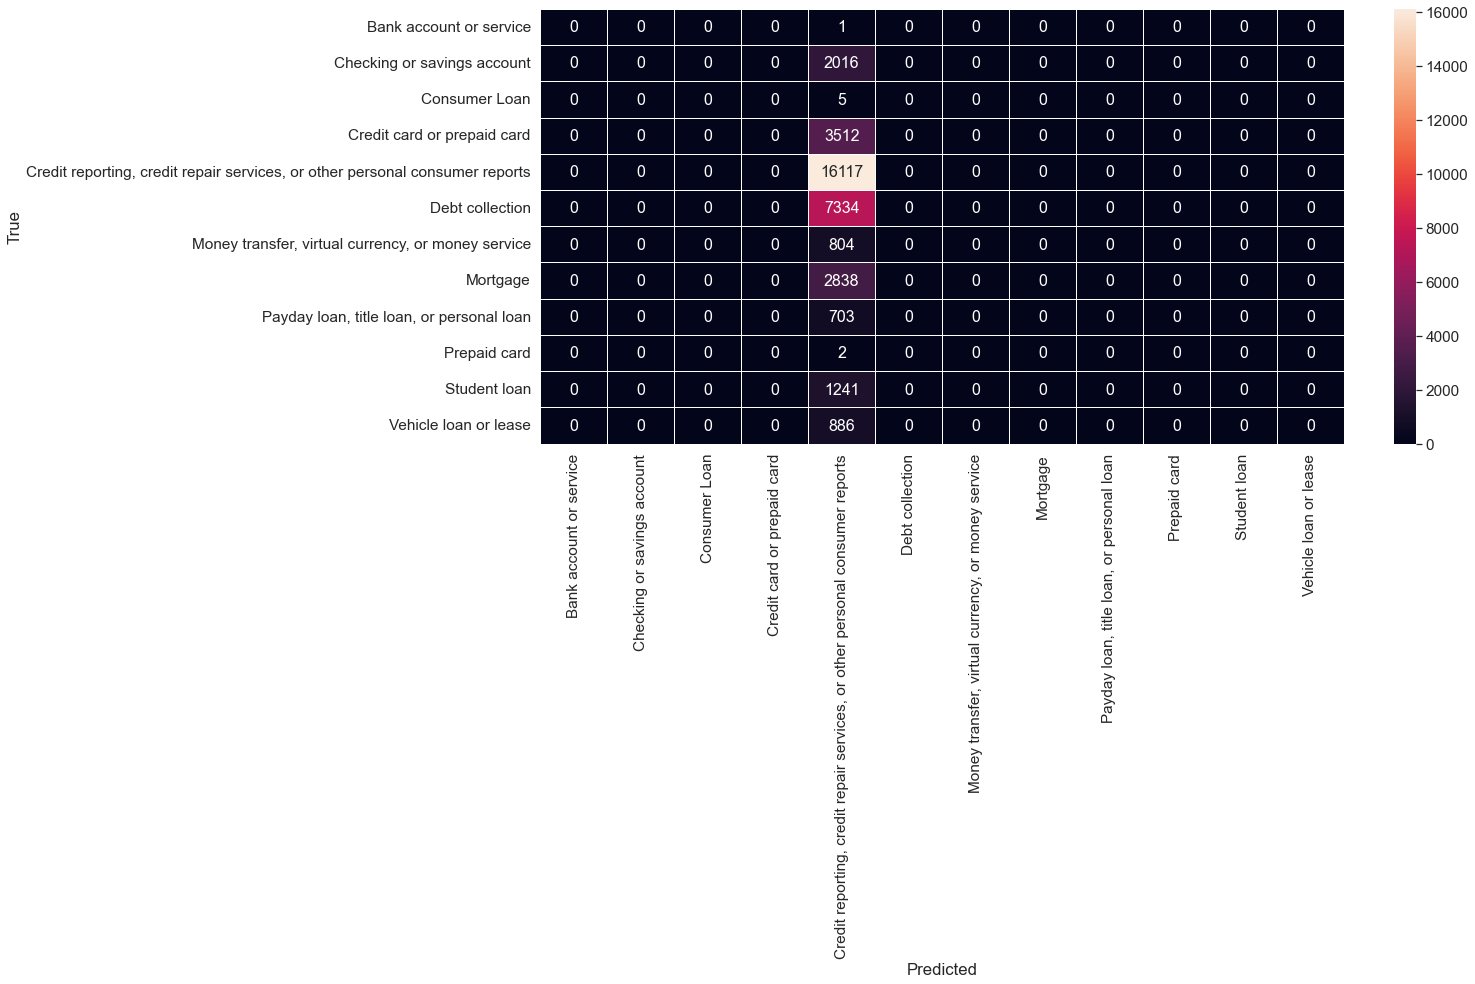

In [94]:
cm = confusion_matrix(expected_classes, predicted_classes)
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()